<a href="https://colab.research.google.com/github/Emkon/Hands-On-Data-Analysis-with-Pandas/blob/master/us_accident_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

bold text# us-accident-analysis

Use the "Run" button to execute the code.

# **US Accident Exploratory Data Analysis**

Data Source: kaggle.com
N\B: This dataset does not contain data for New York, hence, the analysis that will not cover New York.

In [25]:
pip install opendatasets --upgrade --quiet

In [26]:
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/girishwaran/us-accidents-from-2016-to-2020'

od.download(download_url)

Skipping, found downloaded files in "./us-accidents-from-2016-to-2020" (use force=True to force download)


In [27]:
data_filename = '/content/us-accidents-from-2016-to-2020/US_Accidents_June20.csv'

## **`Data Preparation and Cleaning`**

- The following steps will be followed in this analysis
1. Load the file using Pandas
2. Look through first few lines of each column
3. Work onthe missing valuses

In [28]:
import pandas as pd

In [29]:
df = pd.read_csv(data_filename)

In [30]:
df.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [31]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [33]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.478818e+06,3.513617e+06,3.513617e+06,3.513617e+06,1.034799e+06,1.034799e+06,3.513617e+06,1.250753e+06,3.447885e+06,1.645368e+06,3.443930e+06,3.457735e+06,3.437761e+06,3.059008e+06,1.487743e+06
mean,2.080226e+02,2.339929e+00,3.654195e+01,-9.579151e+01,3.755758e+01,-1.004560e+02,2.816167e-01,5.975383e+03,6.193512e+01,5.355730e+01,6.511427e+01,2.974463e+01,9.122644e+00,8.219025e+00,1.598256e-02
std,2.076627e+01,5.521935e-01,4.883520e+00,1.736877e+01,4.861215e+00,1.852879e+01,1.550134e+00,1.496624e+04,1.862106e+01,2.377334e+01,2.275558e+01,8.319758e-01,2.885879e+00,5.262847e+00,1.928262e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.363784e+01,-1.174418e+02,3.399477e+01,-1.183440e+02,0.000000e+00,8.640000e+02,5.000000e+01,3.570000e+01,4.800000e+01,2.973000e+01,1.000000e+01,5.000000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.591687e+01,-9.102601e+01,3.779736e+01,-9.703438e+01,0.000000e+00,2.798000e+03,6.400000e+01,5.700000e+01,6.700000e+01,2.995000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.032217e+01,-8.093299e+01,4.105139e+01,-8.210168e+01,1.000000e-02,7.098000e+03,7.590000e+01,7.200000e+01,8.400000e+01,3.009000e+01,1.000000e+01,1.150000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,1.706000e+02,1.150000e+02,1.000000e+02,5.774000e+01,1.400000e+02,9.840000e+02,2.500000e+01


## **Data Analysis Questions**

1. Are there more accidentsin warmer or colder areas?
2. Which States has the highest number of accidents? How about per capita?
3. Amongst the 49 States in the dataset analysis top 10 States with high profile case of Accident with this period.



### Finding numerical column from this dataset

In [34]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [35]:
numeric_df = df.select_dtypes(include=numerics)

In [36]:
len(numeric_df.columns)

15

In [37]:
numeric_df.head(5)

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,201.0,3,39.865147,-84.058723,NaN,NaN,0.01,NaN,36.9,NaN,91.0,29.68,10.0,NaN,0.02
1,201.0,2,39.928059,-82.831184,NaN,NaN,0.01,2584.0,37.9,NaN,100.0,29.65,10.0,NaN,0.00
2,201.0,2,39.063148,-84.032608,NaN,NaN,0.01,NaN,36.0,33.3,100.0,29.67,10.0,3.5,NaN
3,201.0,3,39.747753,-84.205582,NaN,NaN,0.01,NaN,35.1,31.0,96.0,29.64,9.0,4.6,NaN
4,201.0,2,39.627781,-84.188354,NaN,NaN,0.01,NaN,36.0,33.3,89.0,29.65,6.0,3.5,NaN


# Finding missing values in Pandas

In [38]:
numeric_df.isnull()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,False,False,False,False,True,True,False,True,False,True,False,False,False,True,False
1,False,False,False,False,True,True,False,False,False,True,False,False,False,True,False
2,False,False,False,False,True,True,False,True,False,False,False,False,False,False,True
3,False,False,False,False,True,True,False,True,False,False,False,False,False,False,True
4,False,False,False,False,True,True,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3513613,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3513614,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3513615,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [39]:
numeric_df.head()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,201.0,3,39.865147,-84.058723,NaN,NaN,0.01,NaN,36.9,NaN,91.0,29.68,10.0,NaN,0.02
1,201.0,2,39.928059,-82.831184,NaN,NaN,0.01,2584.0,37.9,NaN,100.0,29.65,10.0,NaN,0.00
2,201.0,2,39.063148,-84.032608,NaN,NaN,0.01,NaN,36.0,33.3,100.0,29.67,10.0,3.5,NaN
3,201.0,3,39.747753,-84.205582,NaN,NaN,0.01,NaN,35.1,31.0,96.0,29.64,9.0,4.6,NaN
4,201.0,2,39.627781,-84.188354,NaN,NaN,0.01,NaN,36.0,33.3,89.0,29.65,6.0,3.5,NaN


In [40]:
df.isna().sum()

ID                             0
Source                         0
TMC                      1034799
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2478818
End_Lng                  2478818
Distance(mi)                   0
Description                    1
Number                   2262864
Street                         0
Side                           0
City                         112
County                         0
State                          0
Zipcode                     1069
Country                        0
Timezone                    3880
Airport_Code                6758
Weather_Timestamp          43323
Temperature(F)             65732
Wind_Chill(F)            1868249
Humidity(%)                69687
Pressure(in)               55882
Visibility(mi)             75856
Wind_Direction             58874
Wind_Speed(mph)           454609
Precipitat

In [41]:
numeric_df.isna().sum()

TMC                  1034799
Severity                   0
Start_Lat                  0
Start_Lng                  0
End_Lat              2478818
End_Lng              2478818
Distance(mi)               0
Number               2262864
Temperature(F)         65732
Wind_Chill(F)        1868249
Humidity(%)            69687
Pressure(in)           55882
Visibility(mi)         75856
Wind_Speed(mph)       454609
Precipitation(in)    2025874
dtype: int64

## **Percentage of Missing values**

In [42]:
missing_percentages = df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentages

End_Lng                  7.054890e-01
End_Lat                  7.054890e-01
Number                   6.440269e-01
Precipitation(in)        5.765779e-01
Wind_Chill(F)            5.317167e-01
TMC                      2.945110e-01
Wind_Speed(mph)          1.293849e-01
Weather_Condition        2.166941e-02
Visibility(mi)           2.158915e-02
Humidity(%)              1.983341e-02
Temperature(F)           1.870779e-02
Wind_Direction           1.675595e-02
Pressure(in)             1.590441e-02
Weather_Timestamp        1.233003e-02
Airport_Code             1.923374e-03
Timezone                 1.104275e-03
Zipcode                  3.042449e-04
Sunrise_Sunset           3.272981e-05
Civil_Twilight           3.272981e-05
Nautical_Twilight        3.272981e-05
Astronomical_Twilight    3.272981e-05
City                     3.187598e-05
Description              2.846070e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Severity                 0.000000e+00
Start_Time  

In [43]:
type(missing_percentages)

pandas.core.series.Series

In [44]:
missing_percentages = missing_percentages[missing_percentages !=0]

## Remove columns that you don't want to use

In [46]:
missing_percentages

End_Lng                  7.054890e-01
End_Lat                  7.054890e-01
Number                   6.440269e-01
Precipitation(in)        5.765779e-01
Wind_Chill(F)            5.317167e-01
TMC                      2.945110e-01
Wind_Speed(mph)          1.293849e-01
Weather_Condition        2.166941e-02
Visibility(mi)           2.158915e-02
Humidity(%)              1.983341e-02
Temperature(F)           1.870779e-02
Wind_Direction           1.675595e-02
Pressure(in)             1.590441e-02
Weather_Timestamp        1.233003e-02
Airport_Code             1.923374e-03
Timezone                 1.104275e-03
Zipcode                  3.042449e-04
Sunrise_Sunset           3.272981e-05
Civil_Twilight           3.272981e-05
Nautical_Twilight        3.272981e-05
Astronomical_Twilight    3.272981e-05
City                     3.187598e-05
Description              2.846070e-07
dtype: float64

In [48]:
del missing_percentages['End_Lat']

In [49]:
del missing_percentages['End_Lng']

## Simply visualization of the Series data

In [51]:
type(missing_percentages)

pandas.core.series.Series

<Axes: >

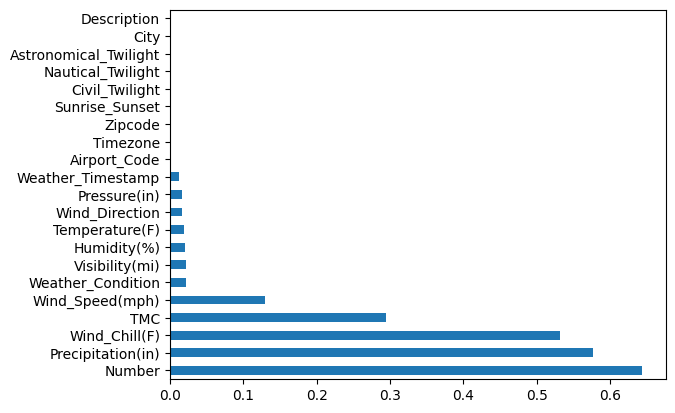

In [50]:
missing_percentages.plot(kind='barh')

In [52]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

# **Exploratory Data Analysis and Visualization**

**Columns to work on**:
1. City
2. Start time
3. Start Lat & Start Lng
4. Temperature
5. Weather Condition

In [57]:
cities = df.City.unique()

In [58]:
cities[:200]

array(['Dayton', 'Reynoldsburg', 'Williamsburg', 'Westerville',
       'Columbus', 'Miamisburg', 'Johnstown', 'Dublin',
       'Canal Winchester', 'Lebanon', 'Sabina', 'Goshen', 'Waynesville',
       'Springboro', 'Carroll', 'Oregonia', 'Independence',
       'Maple Heights', 'Grove City', 'Findlay', 'Fairborn', 'Piqua',
       'New Richmond', 'Batavia', 'Galena', 'Barberton', 'Akron',
       'Mansfield', 'Cleveland', 'Bethel', 'Pataskala', 'Seville',
       'Bellville', 'Troy', 'Wilmington', 'North Olmsted', 'Groveport',
       'Orient', 'Tiro', 'Strongsville', 'Beavercreek', 'Circleville',
       'Peebles', 'Hurricane', 'Xenia', 'Elyria', 'Pickerington',
       'Burbank', 'Zanesville', 'North Baltimore', 'Mount Sterling',
       'Tipp City', 'Moraine', 'Hilliard', 'Bowling Green', 'Maineville',
       'Vermilion', 'Milford', 'Brookpark', 'Fraziers Bottom',
       'Cambridge', 'Delaware', 'Moscow', 'Oberlin', 'Sardinia',
       'Lewis Center', 'Urbancrest', 'Brecksville', 'Frankfort',

In [59]:
len(cities)

11896

In [60]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Houston                         101240
Los Angeles                      79169
Charlotte                        78952
Dallas                           64790
Austin                           63889
                                 ...  
Dilley                               1
Dunnville                            1
Rock Hall                            1
Teachey                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11895, dtype: int64

In [62]:
cities_by_accident.head(10)

Houston          101240
Los Angeles       79169
Charlotte         78952
Dallas            64790
Austin            63889
Raleigh           44675
Atlanta           41126
Oklahoma City     36340
Miami             34549
Baton Rouge       34090
Name: City, dtype: int64

In [63]:
type(cities_by_accident)

pandas.core.series.Series

In [79]:
States_by_acc = df.State.value_counts()

In [80]:
States_by_acc

CA    816825
TX    329284
FL    258002
SC    173277
NC    165958
NY    160817
PA    106787
IL     99692
VA     96075
MI     95983
GA     93614
OR     90122
MN     81863
AZ     78584
TN     69895
WA     68544
OH     66139
LA     61515
OK     60003
NJ     59059
MD     53593
UT     51685
CO     49731
AL     44625
MA     39044
IN     33746
MO     33643
CT     25901
NE     23970
KY     22553
WI     20120
RI     11753
IA     11475
NV     10643
NH      7984
KS      7939
MS      6585
DE      5739
NM      5523
DC      4820
WV      2381
ME      2243
ID      2044
AR      2012
VT       702
MT       512
WY       508
SD        61
ND        44
Name: State, dtype: int64